# Financial Analytics: Group Project
### A Financial Analysis of Electronic Arts

In [1]:
# install required packages
#!pip install prophet

In [38]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from prophet import Prophet

## Ratio Analysis

In [39]:
financial_data = pd.read_csv("C://Users//ramsu//Documents//Ram//Financial//Ratio_analysis_data.csv")
financial_data.columns

Index(['Net Income', 'Total Revenue', 'Gross Profit', 'Cash',
       'Cash Equivalents', 'Inventory', 'Current Assets', 'Total Assets',
       'Total Debt', 'Current Liabilities', 'Operating Expense',
       'Operating Earnings', 'Shareholder Equity', 'Market Value per Share',
       'Earnings per Share (EPS)', 'Dividend Paid'],
      dtype='object')

In [40]:
# Extract necessary values
current_assets = financial_data['Current Assets'].values[0]
current_liabilities = financial_data['Current Liabilities'].values[0]
total_revenue = financial_data['Total Revenue'].values[0]
net_income = financial_data['Net Income'].values[0]
gross_profit = financial_data['Gross Profit'].values[0]
cash = financial_data['Cash'].values[0]
cash_equivalents = financial_data['Cash Equivalents'].values[0]
inventory = financial_data['Inventory'].values[0]
total_assets = financial_data['Total Assets'].values[0]
total_debt = financial_data['Total Debt'].values[0]
operating_expense = financial_data['Operating Expense'].values[0]
operating_earnings = financial_data['Operating Earnings'].values[0]
shareholder_equity = financial_data['Shareholder Equity'].values[0]
market_value_per_share = financial_data['Market Value per Share'].values[0]
eps = financial_data['Earnings per Share (EPS)'].values[0]
dividend_paid = financial_data['Dividend Paid'].values[0]

In [41]:
# Calculate the ratios
current_ratio = current_assets / current_liabilities
quick_ratio = (current_assets) / current_liabilities
cash_ratio = cash_equivalents / current_liabilities
gross_profit_margin = (gross_profit / total_revenue) * 100
operating_profit_margin = (operating_earnings / total_revenue) * 100
return_on_assets = (net_income / total_assets) * 100
return_on_equity = (net_income / shareholder_equity) * 100
return_on_sales = (net_income / total_revenue) * 100
debt_to_equity_ratio = total_debt / shareholder_equity
price_earning_ratio = market_value_per_share/eps
dividends_payout_ratio = (dividend_paid / net_income) * 100
return_ratio = 1-(dividend_paid/net_income)
sustainable_growth_rate = (return_on_equity * return_ratio)

In [42]:
# Creates a dictionary to store the ratios
ratios = {
    "Current Ratio": current_ratio,
    "Quick Ratio": quick_ratio,
    "Cash Ratio": cash_ratio,
    "Gross Profit Margin": gross_profit_margin,
    "Operating Profit Margin": operating_profit_margin,
    "Return on Assets": return_on_assets,
    "Return on Equity": return_on_equity,
    "Return on Sales": return_on_sales,
    "Debt to Equity Ratio": debt_to_equity_ratio,
    "Price Earning Ratio": price_earning_ratio,
    "Dividends Payout Ratio": dividends_payout_ratio,
    "Return Ratio": return_ratio,
    "Sustainable Growth Rate": sustainable_growth_rate
}

In [43]:
#Displays the dictionary with calculated ratios
ratios_df = pd.DataFrame(ratios.items(), columns=['Ratio', 'Value'])
ratios_df

,Ratio,Value
0,Current Ratio,1.208219
1,Quick Ratio,1.208219
2,Cash Ratio,0.737900
3,Gross Profit Margin,75.868570
4,Operating Profit Margin,43.563156
5,Return on Assets,5.958838
6,Return on Equity,10.996846
7,Return on Sales,10.799892
8,Debt to Equity Ratio,0.257781
9,Price Earning Ratio,45.748276


## Monte Carlo Simulation

[*********************100%%**********************]  1 of 1 completed


Date
2024-03-22   -0.005905
2024-03-25   -0.009000
2024-03-26    0.002907
2024-03-27    0.007383
2024-03-28    0.006048
Name: Adj Close, dtype: float64

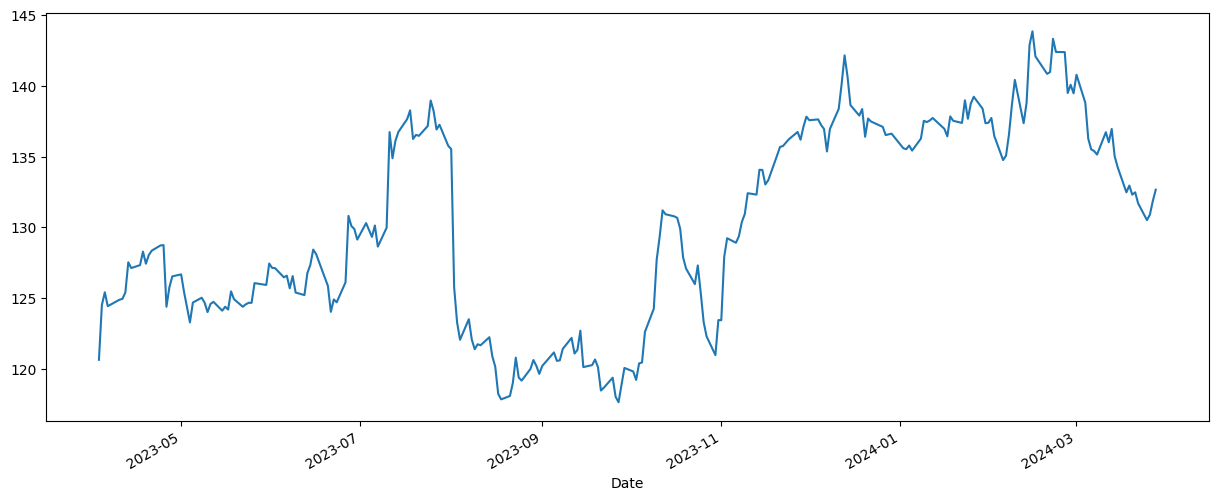

In [44]:
# provide the required time period
start_date = '2023-04-01'
end_date = '2024-03-31'

ticker = ['EA']
df_yf = pdr.get_data_yahoo(ticker,start = start_date,end= end_date)['Adj Close']
df_yf

df_yf.plot(figsize = [15,6])

#calculate the log of adjusted close price to get the daily log returns
stock_returns = np.log(1+df_yf.pct_change())
stock_returns.tail()

Text(0, 0.5, 'Frequency')

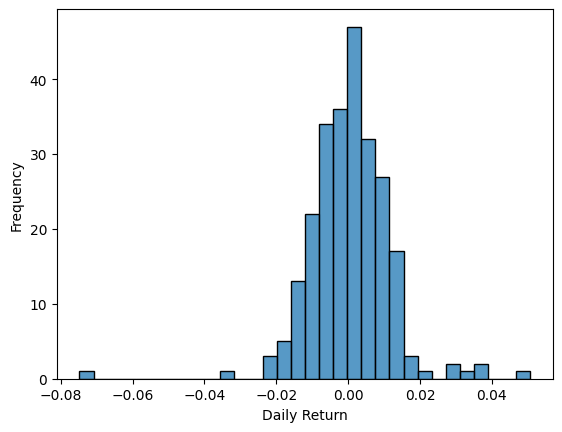

In [45]:
sns.histplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<Axes: xlabel='Date'>

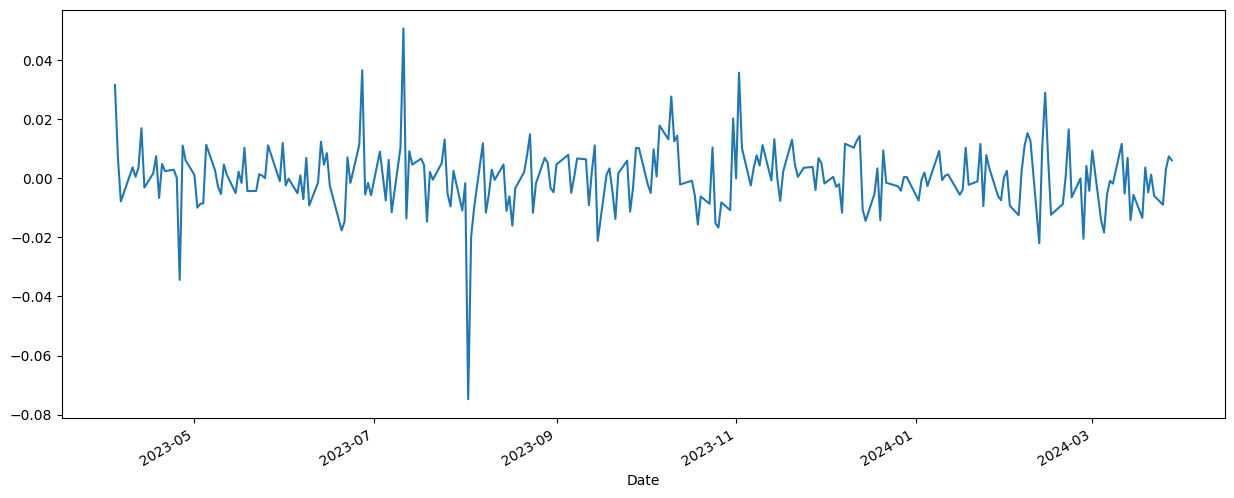

In [46]:
stock_returns.plot(figsize=(15,6))

In [47]:
# Simulation Parameters
u = stock_returns.mean()
var = stock_returns.var()
drift = u - (0.5 * var)
stdev = stock_returns.std()

# Randomization
days = 30
iterations = 100
z = norm.ppf(np.random.rand(days, iterations))

# Generating Daily Returns
get_daily_returns = np.exp(drift + stdev * z)

# Price Paths Simulation
s0 = df_yf.iloc[-1]
price_paths = np.zeros_like(get_daily_returns)
price_paths[0] = s0

for t in range(1, days):
    price_paths[t] = price_paths[t - 1] * get_daily_returns[t]



Text(0.5, 0, 'Days')

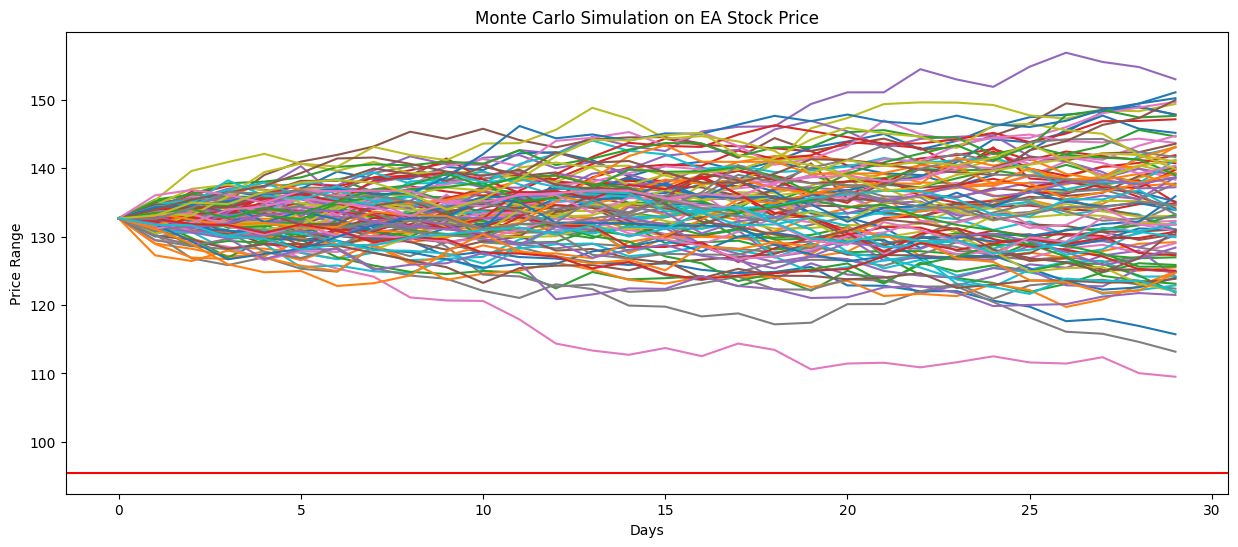

In [48]:
# Plotting Price Paths
plt.figure(figsize=(15, 6))
plt.axhline(y=95.5, color='r', linestyle='-')
plt.plot(pd.DataFrame(price_paths).iloc[:, 0:100])
plt.title('Monte Carlo Simulation on EA Stock Price')
plt.ylabel('Price Range')
plt.xlabel('Days')

## FB Prophet

In [49]:
#import data from excel worksheet
df = pd.read_csv("C://Users//ramsu//Downloads//EA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-01,29.129999,29.490000,28.790001,29.469999,28.902216,3056300
1,2014-04-02,29.750000,29.750000,28.920000,29.129999,28.568768,3291900
2,2014-04-03,28.850000,29.549999,28.670000,28.870001,28.313782,4281100
3,2014-04-04,29.139999,29.350000,28.530001,28.600000,28.048979,2994400
4,2014-04-07,28.469999,28.760000,28.010000,28.340000,27.793991,2930800
5,2014-04-08,28.350000,28.889999,28.320000,28.730000,28.176476,5502100
6,2014-04-09,28.690001,28.889999,27.260000,28.160000,27.617458,6942200
7,2014-04-10,28.240000,28.330000,27.139999,27.219999,26.695570,5461000
8,2014-04-11,27.240000,27.240000,26.639999,26.670000,26.156162,5703900
9,2014-04-14,26.990000,27.450001,26.709999,27.280001,26.754414,3278300


In [50]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,103.030437,104.205731,101.807552,103.031944,101.453856,3.171652e+06
std,31.711181,31.989555,31.375555,31.668769,31.408775,2.245901e+06
min,26.990000,27.240000,26.639999,26.670000,26.156162,5.839000e+05
25%,79.139999,80.042498,78.295002,79.169998,77.644691,1.959600e+06
50%,112.275002,113.270001,111.150002,112.235000,110.518867,2.638200e+06
75%,128.979996,130.132504,127.279999,128.702499,127.214821,3.690750e+06
max,149.059998,151.259995,147.710007,148.970001,146.294556,3.870450e+07


In [51]:
# lists the column names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [52]:
# drops the not required columns
df = df.drop([ 'Open', 'High', 'Low', 'Adj Close', 'Volume'],axis = 1)
df

,Date,Close
0,2014-04-01,29.469999
1,2014-04-02,29.129999
2,2014-04-03,28.870001
3,2014-04-04,28.600000
4,2014-04-07,28.340000
...,...,...
2511,2024-03-22,131.699997
2512,2024-03-25,130.520004
2513,2024-03-26,130.899994
2514,2024-03-27,131.869995


In [53]:
# create the data columns 
columns=['Date', 'Close']
ndf=pd.DataFrame(df, columns=columns)
ndf

,Date,Close
0,2014-04-01,29.469999
1,2014-04-02,29.129999
2,2014-04-03,28.870001
3,2014-04-04,28.600000
4,2014-04-07,28.340000
...,...,...
2511,2024-03-22,131.699997
2512,2024-03-25,130.520004
2513,2024-03-26,130.899994
2514,2024-03-27,131.869995


In [54]:
#fbprophet doesn't understand date and close so we will rename it as df and y.
prophet_df = ndf.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df

,ds,y
0,2014-04-01,29.469999
1,2014-04-02,29.129999
2,2014-04-03,28.870001
3,2014-04-04,28.600000
4,2014-04-07,28.340000
...,...,...
2511,2024-03-22,131.699997
2512,2024-03-25,130.520004
2513,2024-03-26,130.899994
2514,2024-03-27,131.869995


Text(0, 0.5, 'Price')

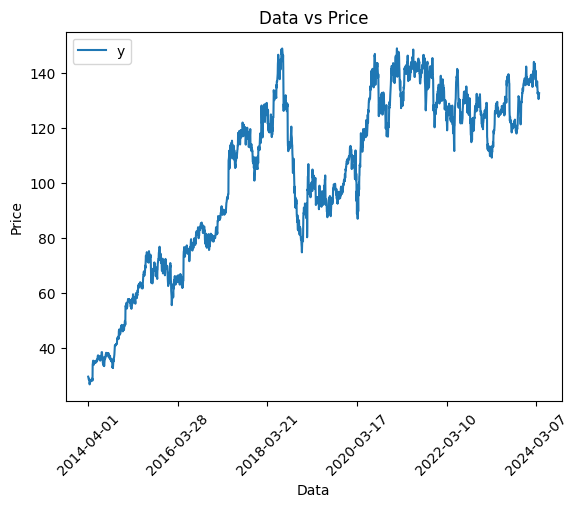

In [55]:
#temp = prophet_df.reset_index()
prophet_df.set_index('ds').plot(rot = 45)
plt.title("Data vs Price")
plt.xlabel('Data')
plt.ylabel('Price')


In [56]:
# fit the data using the prophet
m = Prophet()
m.fit(prophet_df)

01:04:01 - cmdstanpy - INFO - Chain [1] start processing
01:04:02 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
# provides the prediction date frame
future = m.make_future_dataframe(periods=200)
future.tail()

,ds
2711,2024-10-10
2712,2024-10-11
2713,2024-10-12
2714,2024-10-13
2715,2024-10-14


In [58]:
# predicts the future values for the given period
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2711,2024-10-10,132.009933,121.722883,143.494011
2712,2024-10-11,131.934358,121.532738,142.858172
2713,2024-10-12,134.080435,122.964090,145.118555
2714,2024-10-13,134.040257,123.509338,144.445480
2715,2024-10-14,131.768968,120.807691,142.770924


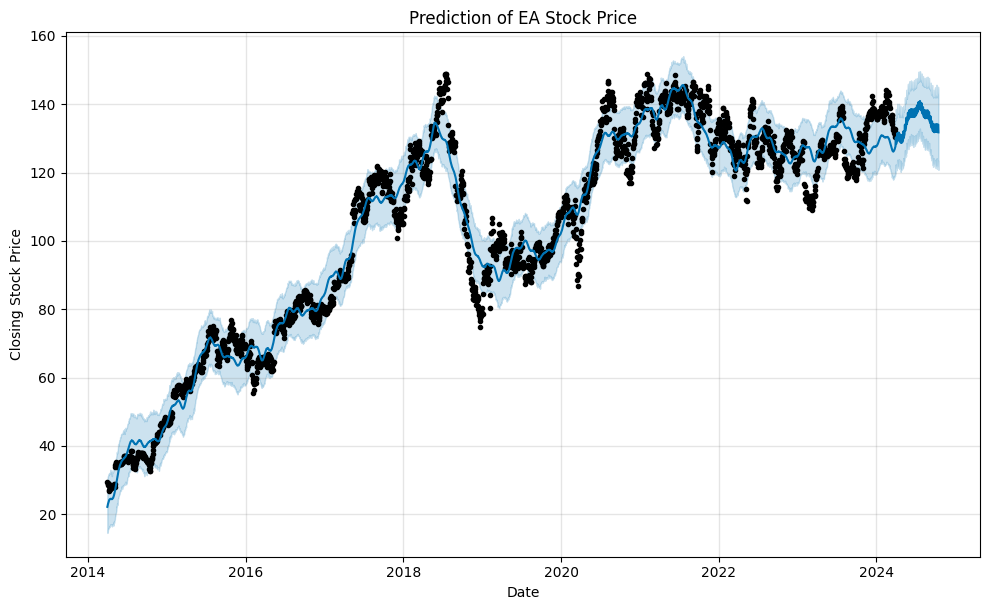

In [59]:
# Plot the values
fig1 = m.plot(forecast)
plt.title("Prediction of EA Stock Price")
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.tick_params()
plt.show()